# Semana 4

## Herencia

Es la **especialización y generalización** entre clases. Decimos que una clase **hereda** de otra si la primera es una especialización de la segunda. La clase que hereda se llama **subclase** y la clase de la que hereda se llama **superclase**.

La **especializaci** son los propios metodos y atributos especificos de la subclase.

Ejemplo: Especializando la clase `Auto`:

Consideremos Auto:
    
    atributos:
        Marca, modelo, color
    
    Metodos:
        conducir, leer_odómetro


Usaremos, entonces, la **herencia**. La herencia nos permite _heredar_ datos y comportamientos de una clase y utilizarlos en otra. En nuestro ejemplo del furgón escolar, crearemos una clase `FurgónEscolar` que hereda de `Auto` y definiremos ahí la lista de estudiantes, y un método de inscripción.

Si `FurgónEscolar` **hereda** de `Auto`, también se dice que:
- `FurgónEscolar` es una **especialización** de la clase `Auto`
- `FurgónEscolar` es una **subclase** (o clase hija) de `Auto`
- `FurgónEscolar` **extiende** a la clase `Auto`
- `Auto` es **superclase** (o clase madre) de `FurgonEscolar`

En Python, la herencia se define de la siguiente manera:

```python
class Auto:

    def __init__(self, marca, modelo, año, color, km):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.color = color
        self._kilometraje = km
        self._dueño = None

    def conducir(self, kms):
        print(f"Conduciendo {kms} kilómetros")
        self._kilometraje += kms

    def vender(self, nuevo_dueño):
        self._dueño = nuevo_dueño
        print(f"Auto vendido a {nuevo_dueño}")

    def leer_odometro(self):
        return self._kilometraje


class FurgonEscolar(Auto): # Aquí se marca de donde hereda
    """Subclase de Auto"""
    
    def __init__(self, marca, modelo, año, color, kms):
        # Para inicializar algunos datos en la clase madre, llamamos explícitamente 
        # al __init__ de esa clase. Por ahora lo llamaremos usando la clase padre,
        # pero más adelante veremos una mejor forma de hacerlo, y es entregándole
        # a python la responsabilidad de encontrar la clase que debe ser llamada
        # a continuación
        Auto.__init__(self, marca, modelo, año, color, kms)
        # Este atributo existe únicamente para objetos de tipo FurgonEscolar, 
        # pero no para todos los objetos de clase Auto 
        self.estudiantes = []
    
    # inscribir_estudiante es un método específico de esta subclase.
    def inscribir_estudiante(self, estudiante):
        self.estudiantes.append(estudiante)
```	
```python	
furgón = FurgonEscolar('Kia', 'Sportage', 2000, "Blanco", 135000)
print(f"Marca: {furgón.marca}")
print(f"Modelo: {furgón.modelo}")
print(f"Color: {furgón.color}")
furgón.conducir(5)
print(f"Kilometraje: {furgón.leer_odometro()}")
furgón.inscribir_estudiante('Benjita')
furgón.inscribir_estudiante('Enzito')
furgón.inscribir_estudiante('Danielita')
furgón.inscribir_estudiante('Dantito')
print(f"Estudiantes: {furgón.estudiantes}")

'''
Marca: Kia
Modelo: Sportage
Color: Blanco
Conduciendo 5 kilómetros
Kilometraje: 135005
Estudiantes: ['Benjita', 'Enzito', 'Danielita', 'Dantito']
'''
```


## Sobreescritura de métodos

La **sobreescritura** de métodos es una característica de la herencia que nos permite modificar el comportamiento de un método en la subclase.

En el ejemplo anterior, la clase `FurgónEscolar` hereda el método `conducir` de la clase `Auto`. Sin embargo, el furgón escolar tiene un comportamiento distinto al de un auto común, ya que debe llevar a los estudiantes a la escuela. Por lo tanto, podemos **sobreescribir** el método `conducir` en la subclase `FurgónEscolar` para que imprima un mensaje distinto.

```python

class FurgonEscolar(Auto):
    """Subclase de Auto"""
    # Estamos haciendo overriding del __init__ original
    def __init__(self, marca, modelo, año, color, kms):
        # Aún queremos usar el __init__ original para setear los otros datos. Así es como podemos llamarlo.
        Auto.__init__(self, marca, modelo, año, color, kms)
        self.estudiantes = []
     # inscribir_estudiante es un método específico de esta subclase.
    def inscribir_estudiante(self, estudiante):
        self.estudiantes.append(estudiante)
    # Estamos haciendo overriding del método conducir original
    # Sobreescritura del método conducir
    def conducir(self, kms):
        # Acá no queremos usar la versión original de conducir
        print(f"Conduciendo {kms} kilómetros hacia la escuela")
        self._kilometraje += kms
```


## Obtener la clase superior: `super()`	

Una forma más legible y limpia de heredar atributos y metodos de la SuperClase.

```python
class FurgonEscolar(Auto):
    """Subclase de Auto"""
    
    # Estamos haciendo overriding del __init__ original
    def __init__(self, marca, modelo, año, color, kms):
        # Aún queremos usar el __init__ original para setear los otros datos. Así podemos llamarlo con super()
        super().__init__(marca, modelo, año, color, kms)
        self.estudiantes = []
    
    # inscribir_estudiante es un método específico de esta subclase.
    def inscribir_estudiante(self, estudiante):
        self.estudiantes.append(estudiante)
        
    # Estamos haciendo overriding del método conducir original
    def conducir(self, distancia):
        # Acá no queremos usar la versión original de conducir
        print(f"Conduciendo con cuidado {distancia} kilómetros")  


furgon = FurgonEscolar('Kia', 'Sportage', 2000, "Blanco", 135000)
print(f"Marca: {furgon.marca}")
print(f"Modelo: {furgon.modelo}")
print(f"Color: {furgon.color}")
furgon.conducir(5)
print(f"Kilometraje: {furgon.leer_odometro()}")
furgon.inscribir_estudiante('Benjita')
furgon.inscribir_estudiante('Enzito')
furgon.inscribir_estudiante('Danielita')
furgon.inscribir_estudiante('Dantito')
print(f"Estudiantes: {furgon.estudiantes}")
```	

## Ejemplo: Herencia con built-ins

Algunas de las clases built-in de python pueden ser cosas como la clase list()

```python
class ContactList(list):
    """
    Estamos extendiendo y especializando la clase list estándar. 
    Tiene todos los métodos de la lista más los definidos por nosotros.
    """
    
    # Buscar un método específico de esta sub-clase
    def buscar(self, nombre):
        matches = []
        for contacto in self:
            if nombre in contacto.nombre:
                matches.append(contacto)
        return matches

class Contacto:
    """La clase Contacto almacena nombre y correo electrónico."""
    
    def __init__(self, nombre, email):
        self.nombre = nombre
        self.email = email


class Familiar(Contacto):
    """Familiar es una clase especializada de Contacto que permite incluir el tipo de relación"""

    # Overriding sobre el método __init__()
    def __init__(self, nombre, email, relacion):
        super().__init__(nombre, email)
        self.relacion = relacion

contactos_list = ContactList()
contactos_list.append(Familiar(nombre="Juan Gómez", email="juan@gomez.cl", relacion="primo"))
contactos_list.append(Contacto(nombre="Komi Shouko", email="komi.san@gmail.com"))
contactos_list.append(Familiar(nombre="Shouko Nishimiya", email="nishimiya@shouko.cl", relacion="Hermana"))
contactos_list.append(Contacto(nombre="Natalia Lafourcade", email="natalia@lafourcade.com"))

personas_llamadas_shouko = []
for contacto in contactos_list.buscar("Shouko"):
       personas_llamadas_shouko.append(contacto.nombre)
print(personas_llamadas_shouko) #['Komi Shouko', 'Shouko Nishimiya']
```

En este ejemplo, la clase `ContactList` extiende a `list` para agregar un método que busca sobre sí misma (`self`) todos los elementos que coincidan con cierto _string_. Una vez creado un objeto de tipo `ContactList`, este objeto posee el método `buscar`.

## Polimorfismo

Mecanismos que permiten que un objeto pueda comportarse de múltiples formas. En Python, el polimorfismo se logra a través de la herencia y la sobreescritura de métodos.

Esto significa que se pueden utilizar objetos de distinto tipo con la misma interfaz.

Los dos mecanismos principales para lograr polimorfismo son:
- **Overriding**: ocurre cuando se implementa un método en una sublace que sobreescribe la implentación del mismo metodo
- **Overloading**: ocurre cuando se implementa un método con el mismo nombre pero con distinto número y tipo de argumentos

Python no soporta el overloading, pero si el overriding. Sin embargo el overloading puede ser simulado con valores por defecto o numero de argumentos variables.

## Overriding

El **overriding** es la capacidad de una subclase de proporcionar una implementación específica de un método que ya está definido en una de sus superclases.

Un ejemplo a contuacion sera con la clase superior de nombre `Variable`, esta es clase que almcae un conjunto de datos en el atributo `data`. Se definen tres clases `Ingresos`, `Comuna` y `Puesto`. Cada uno, como subclase, posee un atributo `data`, y una implementación distinta del método `representante`.


Se define entonces cómo debe funcionar el método `representante` para cada subclase.

- Si los datos son de tipo `Ingresos`, el valor representante es el promedio.
- Si los datos son de tipo `Comuna`, el valor representante es la comuna que más se repite. 
- Si los datos son del tipo `Puesto` de trabajo, entonces el valor representante es el que tiene el puesto más alto según la jerarquía especificada en una lista de categorías.

```python	
import statistics

class Variable:
    def __init__(self, data):
        self.data = data

    def representante(self):
        pass


class Ingresos(Variable):
    def representante(self):
        return statistics.mean(self.data)


class Comunas(Variable):
    def representante(self):
        return statistics.mode(self.data)


class Puestos(Variable):
    # Ordenadas de menor a mayor
    # Este es un atributo de la clase Puestos, compartida por todas sus instancias
    # Este tipo de atributo se accede con la notación NombreDeLaClase.atributoClase
    # Por ejemplo: Puestos.categorias
    categorias = ['Alumno en Practica', 'Analista', 'SubGerente', 'Gerente']

    def representante(self):
        # Paso 1: Transformar la lista en lista de números, donde 0 es alumno en práctica y 3 gerente
        puestos = []
        for cargo in self.data:
            puestos.append(Puestos.categorias.index(cargo))
        # Paso 2: Vemos cuál es el máximo
        maximo = max(puestos)
        # Paso 3: Retornar cargo asociado
        return Puestos.categorias[maximo]


lista_pesos = Ingresos([50, 80, 90, 150, 45, 65, 78, 89, 59, 77, 90])
lista_comunas = Comunas(['Providencia', 'Macul' , 'La Reina' ,'Santiago', 'Providencia', 'Puente Alto',
                        'Macul', 'Santiago', 'Santiago'])
lista_puestos = Puestos(['SubGerente', 'Analista','SubGerente','Analista','Alumno en Practica',
                        'Alumno en Practica'])

print(lista_pesos.representante())
print(lista_comunas.representante())
print(lista_puestos.representante())

'''
79.36363636363636
Santiago
SubGerente
'''
```

## Overloading

Python no soporta definir la misma funcion dos o más veces con difrente tipo o número de argumentos.

```python
def funcion(arg):
    print(arg)


def funcion(arg1, arg2):
    print(arg1, arg2)
    
funcion('este')
funcion('codigo', 'fallará')
```

Es claro ver que el error es por la primera funcion porque python toma en cuenta la definicion más nueva, como esta tiene 1 sola variable falla.

### Overloading de operadores en python

Exiten muchos operadores en python que funcionan para varias clases, por ejemplo el operador `+` funciona para sumar numeros, concatenar strings, unir listas, etc. Esto es un ejemplo de un `overloading`. 


Python nos permite personalizar el método __add__ para que el operador + funcione en algun tipo de clas especifica que queramos.

```python
class Carro:

    def __init__(self, pan, leche, agua):
        self.pan = pan
        self.leche = leche
        self.agua = agua
    
    def __add__(self, otro):
        
        suma_pan = self.pan + otro.pan
        suma_leche = self.leche + otro.leche
        suma_agua = self.agua + otro.agua
            
        return Carro(suma_pan, suma_leche, suma_agua)
    
    def __str__(self):
        return f"Pan:{self.pan}, Leche:{self.leche}, Agua:{self.agua}"

carro_1 = Carro(1, 2, 3)
carro_2 = Carro(3, 4, 5)
carro_sumado = carro_1 + carro_2
print(carro_sumado) # Pan:4, Leche:6, Agua:8
``` 

de la misma manera podemos modificar la mayoría de operadores, por ejemplo, perzonalizar el operador menor que, __lt__.

```python
import math

class Vector: 
    """Vector desde el origen"""
    def __init__(self, x, y): 
        self.x = x 
        self.y = y
        
    def magnitud(self):
        return math.sqrt(self.x ** 2 + self.y ** 2)
    
    def __lt__(self, otro_punto):
        return self.magnitud() < otro_punto.magnitud()

v1 = Vector(2,4)
v2 = Vector(8,3)
print(v1 < v2) # True
```

## __repr__ vs __str__

Podemos implementar ambos metodos para entregar una representación a texto de nuestro objeto, estos metodos deben retornar un string, el que podra ser usado por la función `print()`. Si se implementan ambos, print usa __str__.

La difrencia entre ambos es sutil. Si bien ambos devuelven la representación a texto de un objeto:

- **__str__** se usa para la representación informal de un objeto, y es la que se usa cuando se llama a print(objeto). Debe ser legible para los humanos.
- **__repr__** se usa para la representación formal de un objeto, y es la que se usa cuando se llama a repr(objeto). Debe ser legible para el interprete de python.

```python
class Fraccion:
    def __init__(self, numerador, denominador): 
        self.numerador = numerador 
        self.denominador = denominador
        
    def __repr__(self):
        return f"Fraccion({self.numerador}, {self.denominador})"
    
    def __str__(self):
        return f"{self.numerador} / {self.denominador}"
    
frac = Fraccion(3, 4)

repr(frac) # Fraccion(3, 4)
str(frac) # '3 / 4'
print(frac) # 3 / 4
```
Si no implementamos __str__, python usará __repr__ en su lugar.

## Duck Typing

No importa de que tipo sea un objeto, si se comporta como un pato, entonces es un pato. "Si camina como un pato y suena como un pato, entonces es un pato".

Duck Typing es una caracteristica de algunos lenguajes, que hace que el polimorfismo sea más sencillo. En python, no importa el tipo de objeto que se le pase a una función, si este tiene los metodos necesarios, la función funcionará.

```python
class Pato:
    def gritar(self):
        print("Quack!")
        
    def caminar(self):
        print("Caminando como un pato")        
    
class Persona:
    def gritar(self):
        print("¡Ahhh!")
        
    def caminar(self):
        print("Caminando como un humano")

donald = Pato()
enzo = Persona()
donald.gritar() # Quack!
enzo.gritar() # ¡Ahhh!
```
Si escribimos una función que recibe un argumento, no sabemos, al momento de escribir la función, si el argumento será un pato o una persona. Pero si el argumento tiene los métodos gritar y caminar, la función funcionará.

```python
def activar(pato):  # Esto, en otro tipo de lenguaje, obligaría a que pato sea del tipo "Pato", por lo tanto
    pato.gritar()   # la función activar no podría ser llamada con un argumento tipo "Persona"
    pato.caminar()

donald = Pato()
juan = Persona()
activar(donald)
activar(juan)

'''
Quack!
Caminando como un pato
¡Ahhh!
Caminando como un humano
'''
```

A pesar de ninguna ser una subclase de otra, como tienen los mismos metodos en la funcion activar a python no le interesa si el objeto dado es un pato o un humano, mientras tenga los metodos pedidos va a funcionar.

entonces python es de mecanismo dinámico.




## Multiherencia

Python permite que una clase herede de más de una clase. Esto se llama **multiherencia**.

```python
class Investigador:

    def __init__(self, area='', **kwargs):
        # Utilizamos super() para heredar correctamente
        super().__init__(**kwargs)
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento='', **kwargs):
        # Utilizamos super() para heredar correctamente
        super().__init__(**kwargs)
        self.departamento = departamento
        self.num_cursos = 3

# Aquí decimos que Academico hereda tanto de Docente como de Investigador
class Academico(Docente, Investigador):
    
    def __init__(self, nombre, oficina, **kwargs):
        # Utilizamos super() para heredar correctamente
        super().__init__(**kwargs)
        self.nombre = nombre
        self.oficina = oficina


p1 = Academico(
    "Emilia Donoso",
    oficina="O5",
    area="Inteligencia de Máquina",
    departamento="Ciencia De La Computación"
)
print(p1.nombre)
print(p1.area)
print(p1.departamento)

'''
Emilia Donoso
Inteligencia de Máquina
Ciencia De La Computación
'''
```

Lo anterior es una forma correcta de immplementar la multiherencia, ahora haremos una implementsacion incorrecta que se arreglara poco a poco.

```python
class Investigador:

    def __init__(self, area):
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento):
        self.departamento = departamento
        self.num_cursos = 3
        

class Academico(Docente, Investigador):
    
    def __init__(self, nombre, oficina, area_investigacion, departamento):
        # Esta es la parte incorrecta, pero sigue los contenidos de herencia
        Investigador.__init__(self, area_investigacion)
        Docente.__init__(self, departamento)
        self.nombre = nombre
        self.oficina = oficina

        
p1 = Academico("Emilia Donoso", "O-5", "Inteligencia de Máquina", "Ciencia De La Computación")
print(p1.nombre)
print(p1.area)
print(p1.departamento)
```

Funciona, pero no es la forma correcta de hacerlo. Genera problemas como el problema del diamante, que es un problema que surge cuando una clase hereda de dos clases que a su vez heredan de una misma clase.

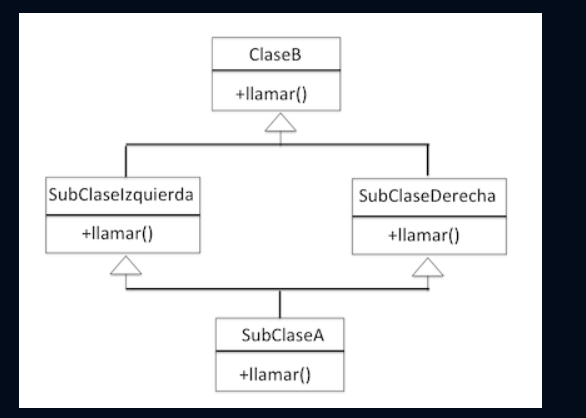

Este diamante es cuando tenemos más de un camino para llegar a una superclase atraves de las subclases, en este caso de SubCLaseA a CLase B hay dos caminos.

Esto pasa cuando no usamos super utilizando el metodo llamar() desde la subclaseA.

```python
class ClaseB:
    
    num_llamadas_B = 0
    
    def llamar(self):
        print("Llamando método en Clase B")
        self.num_llamadas_B += 1


class SubClaseIzquierda(ClaseB):
    
    num_llamadas_izq = 0
    
    def llamar(self):
        print("Estoy en Subclase Izquierda")
        ClaseB.llamar(self)
        print("Llamando método en Subclase Izquierda")
        self.num_llamadas_izq += 1


class SubClaseDerecha(ClaseB):
    
    num_llamadas_der = 0
    
    def llamar(self):
        print("Estoy en Subclase Derecha")
        ClaseB.llamar(self)
        print("Llamando método en Subclase Derecha")
        self.num_llamadas_der += 1


class SubClaseA(SubClaseIzquierda, SubClaseDerecha):
    
    num_llamadas_subA = 0
    
    def llamar(self):
        print("Estoy en Subclase A")        
        SubClaseIzquierda.llamar(self)
        SubClaseDerecha.llamar(self)
        print("Llamando método en Subclase A")
        self.num_llamadas_subA += 1


s = SubClaseA()
s.llamar()
print()
print(f"Llamadas en Subclase A: {s.num_llamadas_subA}")
print(f"Llamadas en Subclase Izquierda: {s.num_llamadas_izq}")
print(f"Llamadas en Subclase Derecha: {s.num_llamadas_der}")
print(f"Llamadas en Clase B: {s.num_llamadas_B}")

'''
Estoy en Subclase A

Estoy en Subclase Izquierda
Llamando método en Clase B
Llamando método en Subclase Izquierda

Estoy en Subclase Derecha
Llamando método en Clase B
Llamando método en Subclase Derecha


Llamando método en Subclase A

Llamadas en Subclase A: 1
Llamadas en Subclase Izquierda: 1
Llamadas en Subclase Derecha: 1
Llamadas en Clase B: 2
'''
```

Podemos apreceriar que el metodo llamar de la ClaseB  fue llamado dos veces.
De esta manera, si, estando en un objeto de `SubClase`, llamamos al método `__init__` tanto de `ClaseA` como de `ClaseB`, estaríamos inicializando dos veces la clase `object`. Eso es precisamente lo que ocurre en el ejemplo de clase `Academico`, la cual llama explícitamente al inicializador de `Investigador` y de `Docente`, lo que tiene como consecuencia que la clase `object` se inicializa dos veces.

### Solución al problema del diamante

Para solucionar el problema del diamante, se debe utilizar la función `super()`. Esta función se encarga de llamar al método de la superclase que corresponda, según el orden de resolución de métodos (MRO, Method Resolution Order) de Python.

El orden va de **izquerda a derecha** dentro de la lista de superclases desde donde herda la subclase.

```python	
class ClaseB:
    
    num_llamadas_B = 0
    
    def llamar(self):
        print("Llamando método en Clase B")
        self.num_llamadas_B += 1


class SubClaseIzquierda(ClaseB):
    
    num_llamadas_izq = 0
    
    def llamar(self):
        print("Estoy en Subclase Izquierda")
        super().llamar()
        print("Llamando método en Subclase Izquierda")
        self.num_llamadas_izq += 1


class SubClaseDerecha(ClaseB):
    
    num_llamadas_der = 0
    
    def llamar(self):
        print("Estoy en Subclase Derecha")
        super().llamar()
        print("Llamando método en Subclase Derecha")
        self.num_llamadas_der += 1


class SubClaseA(SubClaseIzquierda, SubClaseDerecha):
    
    num_llamadas_subA = 0
    
    def llamar(self):
        print("Estoy en Subclase A")
        super().llamar()
        print("Llamando método en Subclase A")
        self.num_llamadas_subA += 1


s = SubClaseA()
s.llamar()
print()
print(f"Llamadas en Subclase A: {s.num_llamadas_subA}")
print(f"Llamadas en Subclase Izquierda: {s.num_llamadas_izq}")
print(f"Llamadas en Subclase Derecha: {s.num_llamadas_der}")
print(f"Llamadas en Clase B: {s.num_llamadas_B}")

'''
Estoy en Subclase A
Estoy en Subclase Izquierda
Estoy en Subclase Derecha
Llamando método en Clase B
Llamando método en Subclase Derecha
Llamando método en Subclase Izquierda
Llamando método en Subclase A

Llamadas en Subclase A: 1
Llamadas en Subclase Izquierda: 1
Llamadas en Subclase Derecha: 1
Llamadas en Clase B: 1
'''
```

Podemos ver que esta vez estamos llamando solamente una vez al metodo llamar de ClaseB. El orden impuesto sería de izquierda a derecha, por lo que primero se llamaría a `SubClaseIzquierda`, luego a `SubClaseDerecha` y finalmente a `ClaseB`.

## Obteniendo el orden de herencia: el método `__mro__`

El método `__mro__` nos permite obtener el orden de resolución de métodos (MRO, Method Resolution Order) de una clase. Este orden es el que Python sigue para buscar un método en una clase que hereda de otras.

```python
SubClaseA.__mro__ 
'''
(<class '__main__.SubClaseA'>, <class '__main__.SubClaseIzquierda'>, <class '__main__.SubClaseDerecha'>, <class '__main__.ClaseB'>, <class 'object'>)
''''
```
Esto depende de que clase se le aplica __mro__ por ejemplo a subvclaseizquierda se le aplica __mro__ y el orden es diferente, dado que subclaseizquierda hereda de claseB y no de subclaseDerecha. entonces subclasederecha no es de su jerarquía.

```python
SubClaseIzquierda.__mro__
'''
(__main__.SubClaseIzquierda, __main__.ClaseB, object)
'''
```

Luego, **No toda estructura de multiherencia esta permitida**. Si se da el caso de que una clase hereda de dos clases que a su vez heredan de una misma clase, se produce un error de herencia múltiple ambigua.

```python
class X():
    def call_me(self):
        print("soy X")
    
class Y():
    def call_me(self):
        print("soy Y")
    
class A(X, Y):
    def call_me(self):
        print("soy A")
    
class B(Y, X):
     def call_me(self):
        print("soy B")

class F(A, B):
    def call_me(self):
        print("soy F")
```
En este caso A y B heredan de X e Y en distinto orden, eso no importa. EL problema nace cuando se crea la clase F que hereda de A y B y aquí python no encuntra un orden de herencia consistente.

Para este caso basta con editar A y B para que hereden de la misma manera.

```python
class X():
    def call_me(self):
        print("soy X")
    
class Y():
    def call_me(self):
        print("soy Y")
    
class A(X, Y):
    def call_me(self):
        print("soy A")
    
class B(X, Y):
     def call_me(self):
        print("soy B")

class F(A, B):
    def call_me(self):
        print("soy F")
        
print(F.__mro__)
'''
(<class '__main__.F'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.X'>, <class '__main__.Y'>, <class 'object'>)
'''
```

## Ejemplo de multiherencia: clase `Academico`

Ahora si utilizamos el codigo mal implementado sabremos que aunque parece correcto estaremos llamando dos veces al inicializador de object.

```python
class Investigador:

    def __init__(self, area):
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento):
        self.departamento = departamento
        self.num_cursos = 3


class Academico(Docente, Investigador):

    def __init__(self, nombre, oficina, area_investigacion, departamento):
        # Queremos reemplazar esto por un super().__init__(...)
        Investigador.__init__(self, area_investigacion)
        Docente.__init__(self, departamento)
        self.nombre = nombre
        self.oficina = oficina


p1 = Academico("Emilia Donoso", "O-5", "Inteligencia de Máquina", "Ciencia De La Computación")
print(p1.nombre)
print(p1.area)
print(p1.departamento)
```

Para solucionar esto se debe usar super() en el metodo __init__ de la clase Academico.

```python
class Investigador:

    def __init__(self, area):
        print("Inicializando investigador")
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento):
        print("Inicializando docente")
        self.departamento = departamento
        self.num_cursos = 3


class Academico(Docente, Investigador):

    def __init__(self, nombre, oficina, area_investigacion, departamento):
        # Solo un llamado, pero solo con un argumento
        super().__init__(departamento)
        self.nombre = nombre
        self.oficina = oficina


print(Academico.__mro__)
p1 = Academico("Emilia Donoso", "O-5", "Inteligencia de Máquina", "Ciencia De La Computación")
print(p1.nombre)
print(p1.area)
print(p1.departamento)
```

El problema es que a pesar de que hay un MRO definido para academico, cuando agregamos un solo arguymento, esto inicializa el init de Docente, pero no de Investigador, por lo que se debe agregar un argumento a super() para que se inicialice el init de Investigador.

```python
class Investigador:

    def __init__(self, area):
        print("Inicializando investigador")
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento):
        print("Inicializando docente")
        self.departamento = departamento
        self.num_cursos = 3


class Academico(Docente, Investigador):

    def __init__(self, nombre, oficina, area_investigacion, departamento):
        # Solo un llamado, con todos los argumentos que tenemos
        super().__init__(departamento, area_investigacion)
        self.nombre = nombre
        self.oficina = oficina


print(Academico.__mro__)
p1 = Academico("Emilia Donoso", "O-5", "Inteligencia de Máquina", "Ciencia De La Computación")
print(p1.nombre)
print(p1.area)
print(p1.departamento)
```

Esto sigue sin servir porque init() recibe solo dos argumentos y le estamos entregando tres, por el self.

### Solución: uso de *args y **kwargs

El problema sucede porque aunque pasemos todos los argumentos a super.init() mninguno de los inicializadores sabe que argumentos son para él, y cuales para el otro.

### Ejemplo_ solucion para clase `Academico`

```python
class Investigador:

    def __init__(self, area):
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento):
        self.departamento = departamento
        self.num_cursos = 3


class Academico(Docente, Investigador):

    def __init__(self, nombre, oficina, area_investigacion, departamento):
        # Queremos reemplazar esto por un super().__init__(...), pero no sabemos qué argumentos usar
        Investigador.__init__(self, area_investigacion)
        Docente.__init__(self, departamento)
        self.nombre = nombre
        self.oficina = oficina


p1 = Academico("Emilia Donoso", "O-5", "Inteligencia de Máquina", "Ciencia De La Computación")
print(p1.nombre)
print(p1.area)
print(p1.departamento)
```
Con diccionarios cambiamos esto

```python
class Investigador:

    def __init__(self, area, **kwargs):
        print(f"init Investigador con area '{area}' y kwargs:{kwargs}")
        super().__init__(**kwargs)
        self.area = area
        self.num_publicaciones = 0


class Docente:

    def __init__(self, departamento, **kwargs):
        print(f"init Docente con depto '{departamento}' y kwargs:{kwargs}")
        super().__init__(**kwargs)
        self.departamento = departamento
        self.num_cursos = 3


class Academico(Docente, Investigador):

    def __init__(self, nombre, oficina, **kwargs):
        print(f"init Academico con nombre '{nombre}', oficina '{oficina}', kwargs:{kwargs}")
        super().__init__(**kwargs)
        self.nombre = nombre
        self.oficina = oficina


print(Academico.__mro__)
print("--------")

p1 = Academico(
    "Emilia Donoso",
    oficina="O5",
    area="I.A.",
    departamento="Computación"
)
print("--------")
print(p1.nombre)
print(p1.area)
print(p1.departamento)

'''
(<class '__main__.Academico'>, <class '__main__.Docente'>, <class '__main__.Investigador'>, <class 'object'>)
--------
init Academico con nombre 'Emilia Donoso', oficina 'O5', kwargs:{'area': 'I.A.', 'departamento': 'Computación'}
init Docente con depto 'Computación' y kwargs:{'area': 'I.A.'}
init Investigador con area 'I.A.' y kwargs:{}
--------
Emilia Donoso
I.A.
Computación
'''
```
Luego esta solucion nos permite hacer todo lo pedido, llamando una sola vez y de manera correcta a los metodos __init__ de las superclases.

Notar que cuando llegas a object todos los keywords de kwargs ya fueron consumidos.

Es muy importatne inculir operadores * y ** para cuando se ocupa multiherencia y cada clase padre recibe argumentos distintos en el __init__

Una adecuada comprensión de los llamados a métodos/funciones usando lista variables de argumentos es muy práctica y flexible. Lo estaremos ocupando en numerosas ocasiones.

## Ejemplo multiherencia: clase `Avatar`

Vamos a modelar a avatar maestro de los 4 elementos.

```python
class MaestroFuego:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro fuego")
        
    def fuego_control(self):
        print("¡Fuego control!")

        
class MaestroAgua:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro agua")
    
    def agua_control(self):
        print("¡Agua control!")

            
class MaestroTierra:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro tierra")

    def tierra_control(self):
        print("¡Tierra control!")
        
        
class MaestroAire:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro aire")
        
    def aire_control(self):
        print("¡Aire control!")
    
# Ahora creamos la clase Avatar que es un maestro de los 4 elementos.

class Avatar(MaestroFuego, MaestroAgua, MaestroTierra, MaestroAire):
    def __init__(self, nombre: str):
        super().__init__(nombre)

el_ultimo_maestro_aire = Avatar("Aang")
el_ultimo_maestro_aire.saludar() # Hola!! mi nombre es Aang y soy un maestro fuego

'''
```

Luego esto es un error, queríamos que dijiera que era maestro de los cuatro elementos.

Esto pasa porque ele avatar hereda 4 clases y cada clase tiene el mismo metodo que es saludar en este caso se quesara el metodo de la primera clase que heredamos.

Usando super() tampoco funciona.

Si super() se encarga de crear un mro correcto y asegurarse de llamar a cada clase una sola vez, entoncdes tambien llama solo a la primera clase que heredemos.


Una solucion no recomendada es agregar super().saludar() a cada clase, 
dado el mro de avatar -->(__main__.Avatar,
 __main__.MaestroFuego,
 __main__.MaestroAgua,
 __main__.MaestroTierra,
 __main__.MaestroAire,
 object)

Con esto cada metodo saludar llamara al metodo saludar de la dsiguente clase, super().saludar() iría desde maestro fuego hasta tierra.


Esto nos generará dos problemas:

1. Vamos a llamar segun el orden, si no se cumple el orden establecido al llamar a las clases padre, entonces no se imprimira lo pedido:

```python

# Versión 2 - Usando super() dentro de los 3 primeros maestros

class MaestroFuego:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        super().saludar() # Agregar super() para forzar que se llame al siguiente saludar dentro del MRO
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro fuego")
        
    def fuego_control(self):
        print("¡Fuego control!")

        
class MaestroAgua:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        super().saludar() # Agregar super() para forzar que se llame al siguiente saludar dentro del MRO
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro agua")
    
    def agua_control(self):
        print("¡Agua control!")

            
class MaestroTierra:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        super().saludar() # Agregar super() para forzar que se llame al siguiente saludar dentro del MRO
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro tierra")

    def tierra_control(self):
        print("¡Tierra control!")
        
        
class MaestroAire:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        # No agregamos super porque esto llamaría a object y esa clase no tiene saludar()
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro aire")
        
    def aire_control(self):
        print("¡Aire control!")     
        
        
class Avatar(MaestroFuego, MaestroAgua, MaestroTierra, MaestroAire):
    def __init__(self, nombre: str):
        super().__init__(nombre)
        
    def saludar(self):
        super().saludar()

la_sucesora_de_aang = Avatar("Korra")
la_sucesora_de_aang.saludar()

'''
Hola!! mi nombre es Korra y soy un maestro aire
Hola!! mi nombre es Korra y soy un maestro tierra
Hola!! mi nombre es Korra y soy un maestro agua
Hola!! mi nombre es Korra y soy un maestro fuego
'''

# Si cambiamos el orden

class Avatar(MaestroFuego, MaestroAire, MaestroAgua, MaestroTierra):
    def __init__(self, nombre: str):
        super().__init__(nombre)
        
    def saludar(self):
        super().saludar()
        
la_sucesora_de_aang = Avatar("Korra")
la_sucesora_de_aang.saludar()

'''
Hola!! mi nombre es Korra y soy un maestro aire
Hola!! mi nombre es Korra y soy un maestro fuego
'''
```

2. Esto hace que no se pueden instanciar bien las otras clases porque super() no tiene el metodo saludar.

Esto ocurre al instarciar a maestro fuego, probocando que esta use super y llame a object que no tiene el metodo saludar.

Finalmente, una solucion sensata es no usar super() en los metodos que se repiten, en este caso saludar instanciando a cada metodo en el init de avatar.

```python
# Versión 3 - No usar super en cada Maestro, pero que Avatar llame al método de cada maestro.

class MaestroFuego:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro fuego")
        
    def fuego_control(self):
        print("¡Fuego control!")

        
class MaestroAgua:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro agua")
    
    def agua_control(self):
        print("¡Agua control!")

            
class MaestroTierra:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro tierra")

    def tierra_control(self):
        print("¡Tierra control!")
        
        
class MaestroAire:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro aire")
        
    def aire_control(self):
        print("¡Aire control!")

        
class Avatar(MaestroFuego, MaestroAgua, MaestroTierra, MaestroAire):
    def __init__(self, nombre: str):
        super().__init__(nombre)
        
    def saludar(self):
        MaestroFuego.saludar(self)
        MaestroAgua.saludar(self)
        MaestroTierra.saludar(self)
        MaestroAire.saludar(self)

el_antecesor_de_aang = Avatar("Roku")
el_antecesor_de_aang.saludar()

'''
Hola!! mi nombre es Roku y soy un maestro fuego
Hola!! mi nombre es Roku y soy un maestro agua
Hola!! mi nombre es Roku y soy un maestro tierra
Hola!! mi nombre es Roku y soy un maestro aire
'''
```

## Reflexión

Con esto nos damos cuenta de las dificultades de la multiherencia y que super puede solucionar el problema del diamante pero puede generar dificultades o necesidades de modificar codigo ya existente.

De todas formas avatar al llamar a cuatro clases, gana acesso a 4 metodos distintos 1 de cada una.

Finalmente como modelamos el problema:

```python	
class MaestroFuego:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro fuego")
        
    def elemento_control(self):
        print("¡Fuego control!")

        
class MaestroAgua:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro agua")
    
    def elemento_control(self):
        print("¡Agua control!")

            
class MaestroTierra:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro tierra")

    def elemento_control(self):
        print("¡Tierra control!")
        
        
class MaestroAire:
    def __init__(self, nombre: str):
        self.nombre = nombre
        
    def saludar(self):
        print(f"Hola!! mi nombre es {self.nombre} y soy un maestro aire")
        
    def elemento_control(self):
        print("¡Aire control!")

        
class Avatar(MaestroFuego, MaestroAgua, MaestroTierra, MaestroAire):
    def __init__(self, nombre: str):
        super().__init__(nombre)
        
    def saludar(self):
        MaestroFuego.saludar(self)
        MaestroAgua.saludar(self)
        MaestroTierra.saludar(self)
        MaestroAire.saludar(self)
        
    def fuego_control(self):
        MaestroFuego.elemento_control(self)
        
    def agua_control(self):
        MaestroAgua.elemento_control(self)
        
    def tierra_control(self):
        MaestroTierra.elemento_control(self)
        
    def aire_control(self):
        MaestroAire.elemento_control(self)

kyoshi = Avatar("kyoshi")
kyoshi.saludar()
print()
kyoshi.fuego_control()
kyoshi.agua_control()
kyoshi.tierra_control()
kyoshi.aire_control()

'''
Hola!! mi nombre es kyoshi y soy un maestro fuego
Hola!! mi nombre es kyoshi y soy un maestro agua
Hola!! mi nombre es kyoshi y soy un maestro tierra
Hola!! mi nombre es kyoshi y soy un maestro aire

¡Fuego control!
¡Agua control!
¡Tierra control!
¡Aire control!
'''
```

Algunas preguntas que pueden servir para reflexionar de sus distintas formas son:
- ¿Cuál permite agregar nuevas clases sin editar las anteriores?

    La forma que permitiria agregar nuevas clases sin editar las anteriores es la forma correcta de implementar la multiherencia, usando super() en el init de la subclase.

- ¿Cuál no presentaría problema del diamante?
    La que no presentaría problema del diamante es la forma correcta de implementar la multiherencia, usando super() en el init de la subclase.

- ¿Estoy generando código nuevo desde cero o estoy modificando código existente?
    Si se esta generando codigo nuevo desde cero, se puede usar super() en el init de la subclase, si se esta modificando codigo existente, se debe tener cuidado con el uso de super().

- Si tengo subclases, ¿estas deben funcionar de forma independiente o solo son un medio para que las clases que heredan de estas funcionen correctamente?
    Las subclases deben funcionar de forma independiente, pero tambien deben ser un medio para que las clases que heredan de estas funcionen correctamente.

## Encapsulamiento

El encapsulamiento suele proveerse mediante atributos publicos o privados. En python todos los atributos y metodos son publicos. EL hecho de iniciar un atributo o metodo con guones bajos (underscore) no asegura un caracter privado de estos. Esto es solo  una buena practica para sugerir que esto es un caracter interno de la clase.

Una consecuencia de estosos atributos privados (o casi privados) es que si queremos modificarlos tenemos que forzozamente usa run metodo de la clase que lo modifique.

En el paradiga de OOP se definen metodos especificos para **obtener el valor de un atributo(privado)** y **actualizar el valor de un atributo(privado)**.

A estos metodo se les llama **getter** y **setter** respectivamente.

Revisemos un ejemplo de la clase Auto.

```python
class Auto:
    
    def __init__(self, marca, modelo, año, color, km):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.color = color
        self._kilometraje = km # Atributo privado
        self._ubicacion = (-33.45, -70.63) # Atributo privado
        self.dueño = None

    def conducir(self, kms):
        self._kilometraje += kms
        self._modificar_ubicacion()

    def vender(self, nuevo_dueño):
        self.dueño = nuevo_dueño

    def leer_odometro(self):
        return self._kilometraje

    # Setter, metodo para modificar el valor de un atributo privado
    def _modificar_ubicacion(self):
        print("Calcula nueva ubicación")
        self._ubicacion = (self._ubicacion[0] + 0.01, self._ubicacion[1] - 0.01)
```	

Luego podriamos crear setters y getters para los atributos privados.

```python
class Auto:
    
    def __init__(self, marca, modelo, año, color, km):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.color = color
        self._kilometraje = km
        self._ubicacion = (-33.45, -70.63)
        self.dueño = None

    ## Método getter
    def get_kilometraje(self):
        return self._kilometraje
    
    ## Método setter
    def set_kilometraje(self, kms):
        self._kilometraje = kms
        
    def conducir(self, kms):
        self._kilometraje += kms
        self._modificar_ubicacion()

    def vender(self, nuevo_dueño):
        self.dueño = nuevo_dueño

    def leer_odometro(self):
        return self._kilometraje

    def _modificar_ubicacion(self):
        print("Calcula nueva ubicación")
        self._ubicacion = (self._ubicacion[0] + 0.01, self._ubicacion[1] - 0.01)
```

Python provee una forma de cumplir esto del encapsulamiento, este mecanismos son las **properties**.

## Properties: `property()`

Una property en python funciona como un atributo, pero sobre el cual podemos modificar su comportamiento cada vez que es leído (get), escrito (set) o eliminado (del). **El ultimo no lo vamos a ver en el curso**

Al usar el mecanismo de propierties sobre un atributo podemos ejecutar acciones de manera más limpia que invocando metodos explicitos que leean o mdifiquen el valor de un objeto.

## ¿Para que las properties?

Un ejemplo sencillo es cuando no queremos que modifiquen un valor muy sencillamanete, dado un valor maximo para este.

```python
class Puente:
    
    def __init__(self, maximo):
        self.maximo = maximo
        self.personas = 0
        
puente = Puente(10)
puente.personas += 7
print(f"Hay {puente.personas} personas en el puente.")
puente.personas += 5
print(f"Hay {puente.personas} personas en el puente.")
puente.personas -= 15
print(f"Hay {puente.personas} personas en el puente.")

'''
Hay 7 personas en el puente.
Hay 12 personas en el puente.
Hay -3 personas en el puente.
'''
```

Podriamos crear unas condiciones que permitan que las personan vivan en un rango de [0, maximo] sin embargo:

1. Esto entorpece la lectura del codigo y su mantenimiento
2. Esto no cumple con el principio de encapsulamiento que es que la clase se haga cargo de esto, no codigo externo.

La siguiente forma encapsula el atributo personas dentro de metodos especialmente defnidos para leerlo y modificarlo.

```python
class Puente:
    
    def __init__(self, maximo):
        self.maximo = maximo
        self._personas = 0 # Atributo privado
    
    # Metodo para obtener el valor de un atributo privado. (Getter)
    def contar(self):
        return self._personas
    # Metodo para modificar el valor de un atributo privado. (Setter)
    def ingresar(self, p):
        if self._personas + p > self.maximo:
            self._personas = self.maximo
        elif self._personas + p < 0:
            self._personas = 0
        else:
            self._personas += p
            
            
puente = Puente(10)
puente.ingresar(7)
print(f"Hay {puente.contar()} personas en el puente.")
puente.ingresar(5)
print(f"Hay {puente.contar()} personas en el puente.")
puente.ingresar(-15)
print(f"Hay {puente.contar()} personas en el puente.")

'''
Hay 7 personas en el puente.
Hay 10 personas en el puente.
Hay 0 personas en el puente.
'''
```

De todas maneras esto es poco escalable si cambiamos los nombres de los metodos, luego la mejor forma de unir sintaxis y encapsulamiento son las properties.

```python
class Puente:
    
    def __init__(self, maximo):
        self.maximo = maximo
        self._personas = 0
        
    @property # Getter/Consultor
    def personas(self):
        return self._personas

    @personas.setter # Setter/Modificador
    def personas(self, p):
        if p > self.maximo:
            self._personas = self.maximo
        elif p < 0:
            self._personas = 0
        else:
            self._personas = p
            
            
puente = Puente(10)
puente.personas += 7
print(f"Hay {puente.personas} personas en el puente.")
puente.personas += 5
print(f"Hay {puente.personas} personas en el puente.")
puente.personas -= 15
print(f"Hay {puente.personas} personas en el puente.")

'''
Hay 7 personas en el puente.
Hay 10 personas en el puente.
Hay 0 personas en el puente.
'''
```

Primero vemos que creamos el getter con @property y el setter con @personas.setter, luego podemos modificar el valor de personas como si fuera un atributo, pero en realidad estamos llamando a un metodo.

A @ se le llama decorador, y es una forma de modificar el comportamiento de una funcion o metodo.

Primero creamos la property personas con el decorador y definiendo el metodo getter personas.

Luego creamos su setter con @personas.setter y definiendo el metodo personas.

Nos damos cuenta que ambos metodos tienen el mismo nombre, esto es porque python permite que dos metodos tengan el mismo nombre si tienen decoradores distintos.

Finalmente la forma de llamar al getter y setter es como si fueran atributos.

En el codigo con mala sintaxis, utilizabamos puente.contar() para obtener las personas en el puente, aqui en cambio utilizamos las properties como si fueran atributos.

Si vemos al ingresar datos usbamaos:

puente.ingresar(7) -> puente.personas += 7

puente.contar() -> puente.personas

## Otra manera de definir properties

Una manera más explicita que provee python es definiendo los metodos get y set, (pueden tener otros nombres) y luego la funcion property.

```python
class Puente:
    
    def __init__(self, maximo):
        self.maximo = maximo
        self._personas = 0
        
    def _get_personas(self):
        return self._personas

    def _set_personas(self, p):
        if p > self.maximo:
            self._personas = self.maximo
        elif p < 0:
            self._personas = 0
        else:
            self._personas = p
        
    personas = property(_get_personas, _set_personas)

    
puente = Puente(10)
puente.personas += 7
print(f"Hay {puente.personas} personas en el puente.")
puente.personas += 5
print(f"Hay {puente.personas} personas en el puente.")
puente.personas -= 15
print(f"Hay {puente.personas} personas en el puente.")

'''
Hay 7 personas en el puente.
Hay 10 personas en el puente.
Hay 0 personas en el puente.
'''
```

## Ejemplo: Caching de páginas web

Es muy comun que un servidor web cachee paginas web para mejorar la velocidad de respuesta. Esto se puede hacer de manera muy sencilla con properties.

Al cachear guarda una copia de la pagina por si el usario planea volver en el corto plazo. De esta forma se evita bajar todo el contenido otra vez.

Este mecanismo se llama caching.

Tenemos la clase WebPage con un atributo __content que coresponde al contenido de una pagina web. Si un usuario accede a una pagina por primera vez se descarga y guarda de esta forma en los proximos acessos podemos retornar el contenido guardado sin la necesidad de bajarlo de nuevo.

```python
from urllib.request import urlopen

class WebPage:

    def __init__(self, url):
        self.url = url
        self._content = None
        
    @property
    def content(self):
        if not self._content:
            print("Obteniendo página web...")
            self._content = urlopen(self.url).read()
        return self._content

import time

page = WebPage("http://www.uc.cl")
now = time.time()                  # devuelve el tiempo en segundos
contenido_1 = page.content         # llama a la property 'content', que baja el contenido
print(f"Tiempo en obtener la página por primera vez: {time.time() - now} segundos.")

now = time.time()
contenido_2 = page.content         # llama a la property 'content', y esta vez no baja de nuevo el contenido
print(f"Tiempo en obtener la página por segunda vez: {time.time() - now} segundos.")

print(contenido_1 == contenido_2)

'''
Obteniendo página web...
Tiempo en obtener la página por primera vez: 1.6151742935180664 segundos.
Tiempo en obtener la página por segunda vez: 2.9087066650390625e-05 segundos.
True
'''
```

De esta sencilla manera hemos añadido un coportamiento al getter de obtener la pagina web y luego solo mostrarla si ya la visitamos.


## Clases Abstractas

Son como un molde, su intencion no es ser instanciadas, sino que ser heredadas por otras clases que si seran instanciadas.

Por ejemplo, la clase `Mamifero` representa algo abstracto, no tiene forma específica, pero sí describe otras clases concretas, como `Perro`, `Humano` y `Ballena`. En términos de clases, se podría suponer que los ejemplos anteriores heredan de `Mamifero`. Luego `Mamifero` no puede tomar vida por sí sola a menos de que sea *subclaseada*, es decir, una instancia de la clase `Mamifero` no tendría mucho sentido por si sola, necesitamos saber a qué (subclase) mamífero corresponde (`Perro`, `Humano`, `Ballena`, etc.) para que sepamos cómo se comporta, su tamaño, etc. Son las subclases de la clase abstracta las que deben ser instanciadas.

Luego los metodos abstractos, son los metodos base que deberán ser implementados por las subclases. Esto nos plantea un metodo con un funcionamiento minimo para cada subclase.

Las clases abstractas tambien pueden tener metodos normales, que no son necesarios re_implementar en las subclases.

Entonces, es **abstracta** si:

* Es una clse que no deberia instanciarce
* Contiene uno o más metodos abstractos.
* Sus subclases implementan **todos** sus metodos abstractos.

## Abstract Base Classes (ABCs)

No tiene una forma de definir clases abrtactas pero si existe el módulo `abc` que provee una clase llamada `ABC` que permite definir clases abstractas. Esto con el decorador `@abstractmethod`.

```python
from abc import ABC, abstractmethod

class Base(ABC):

    @abstractmethod
    def metodo_1(self):
        pass

    @abstractmethod
    def metodo_2(self):
        pass

instancia = Base() # Error, no se puede instanciar una clase abstracta

class SubClase(Base):

    def metodo_1(self):
        pass
    def metodo_2(self):
        pass

instancia = SubClase1()
print(instancia) # <__main__.SubClase1 object at 0x7f8b3c3b3d30>
print(f'Es subclase: {issubclass(SubClase1, Base)}') # True
print(f'Es instancia: {isinstance(instancia, Base)}') # True
```
Siempre deben tener todos los metodos de la clase abstracta las subclases, si no lo tiene no funcionan.

Las clases abstractas **no deben solo contener métodos abastractos** pueden tener metodos no abstractos que heredarán las subclases.

```python
from abc import ABC, abstractmethod

class Base(ABC):

    def __init__(self, nombre):
        self.nombre = nombre
        self.contador = 0

    def metodo_1(self):
        self.contador += 1

    @abstractmethod
    def metodo_2(self):
        self.contador += 2
    

class SubClase1(Base):

    def metodo_2(self):
        self.contador += 3

instancia_1 = SubClase1("1")
print(instancia_1.contador)
instancia_1.metodo_1()
print(instancia_1.contador)
instancia_1.metodo_2()
print(instancia_1.contador)

'''
0
1
4
'''
```

Si queremos reutilizar el mismo metodo 2 de la clase abstracta accedemos con super().

```python
class SubClase2(Base):

    def metodo_2(self):
        super().metodo_2()
```
